In [10]:
import os, sys
import torch
import torch.nn as nn
import torchvision as torchv
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image

In [11]:
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except:
    current_dir = os.getcwd() 

module_path = os.path.join(current_dir, "module")
sys.path.append(module_path)

from data_mod import ImageDataModule
from model_mod import Resnet18Classifier, TrainModel

utility_path = os.path.join(current_dir, "../Utility")
sys.path.append(utility_path)

from utility_mod import Util

In [12]:
yaml_path = os.path.join(current_dir, "params.yaml")
data_params = Util.get_params(yaml_path)
data_params.update(data_params["data"])
model_params = Util.get_params(yaml_path)
model_params.update(data_params["model"])

idm = ImageDataModule(data_params)

In [13]:
idm.data_path = os.path.join(current_dir, "data")

idm.set_input_transform()
idm.fetch_dataset()
train_dataloader, val_dataloader = idm.get_data_loader(percent_data = data_params["data_percent"])

fetch_dataset()
len(self.train_dataset)=60000, len(self.test_dataset)=10000
self.train_dataset[0][0].shape=torch.Size([3, 244, 244])
get_data_loader()


In [14]:
len(val_dataloader)

8

In [15]:
# for batch in train_dataloader:
#     img_tensor = batch[0].to(model_params["device"])
#     label_tensor = batch[1].to(model_params["device"])
#     print(f"{img_tensor.shape=} {label_tensor.shape=}")
# model_params.keys()

In [16]:
# train_dataloader, val_dataloader = sdm.get_data_loader(percent_data = data_params["data_percent"])
model = Resnet18Classifier(model_params["dim_list"], model_params["dropout"], model_params["num_groups"])
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=model_params["optimizer_lr"])

train_model = TrainModel(model_params, train_dataloader, val_dataloader, model, loss_func, optimizer)
output = train_model.train_model()

train_model()
model_epoch(mode='train')
batch_num=0/46total_loss=2.4950554370880127
total_pred=64
pred_tensor=tensor([1, 8, 1, 1, 1, 1, 8, 8, 8, 1, 8, 1, 8, 1, 8, 1, 1, 1, 8, 1, 8, 1, 7, 1,
        1, 1, 1, 1, 1, 1, 9, 1, 7, 8, 1, 8, 8, 1, 8, 1, 7, 8, 8, 8, 1, 1, 8, 1,
        1, 1, 7, 1, 8, 1, 8, 1, 1, 1, 1, 8, 1, 1, 8, 8])
label_tensor=tensor([6, 2, 8, 5, 1, 5, 0, 2, 3, 9, 5, 4, 5, 8, 5, 7, 6, 2, 5, 7, 3, 7, 4, 0,
        0, 0, 5, 9, 7, 9, 2, 1, 6, 9, 5, 0, 1, 4, 6, 9, 7, 0, 2, 5, 5, 4, 4, 1,
        3, 4, 1, 3, 0, 9, 7, 3, 7, 8, 4, 9, 3, 6, 6, 4])
correct_pred=4
batch_num=1/46total_loss=4.9137866497039795
total_pred=128
pred_tensor=tensor([5, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 7, 1, 0, 1, 4, 1, 8, 5, 1, 8, 1,
        8, 8, 9, 8, 8, 9, 8, 1, 8, 8, 1, 8, 1, 8, 1, 8, 1, 8, 1, 3, 1, 1, 1, 1,
        1, 8, 1, 1, 1, 8, 8, 1, 1, 8, 9, 1, 3, 1, 1, 1])
label_tensor=tensor([4, 6, 2, 3, 6, 0, 8, 4, 7, 2, 4, 8, 9, 5, 2, 6, 3, 3, 1, 7, 7, 3, 1, 0,
        1, 0, 5, 6, 3, 2, 1, 1, 4, 3, 4, 8, 0, 

plot_metrics()


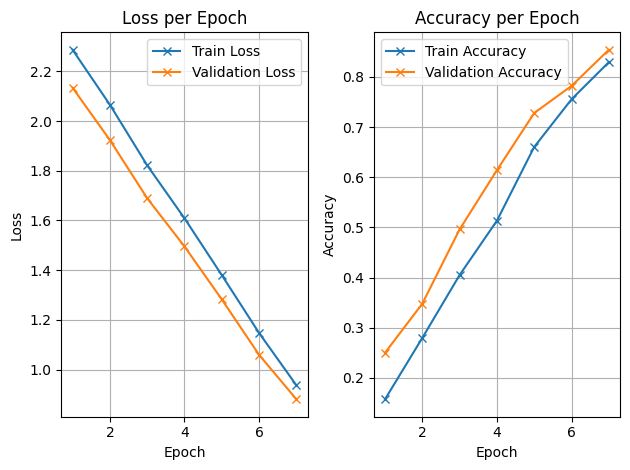

In [17]:
import pandas as pd
metrics_df = pd.DataFrame(output)
plt = train_model.plot_metrics(metrics_df)
Util.increment_model_index(yaml_path)
metrics_df = pd.DataFrame(output)
model_params["index"]+=1

output_path = f"{current_dir}/output/resnet18_model_{model_params['index']}"

os.mkdir(output_path)
torch.save(model.state_dict(), f"{output_path}/model.pt")
plt.savefig(f"{output_path}/loss_accuracy_plot.png")
del model_params['device']
Util.write_yaml(output_path+"/config.yaml", model_params) 
